# Анализ стоимости квартир в Москве и Московской области

#### данные актуальны на момент ноября 2023 года

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *
import seaborn as sns

In [5]:
df = pd.read_csv('flats_cost.csv')
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


1. Price: Цена квартиры в указанной валюте
2. Apartment type: Тип квартиры, такой как студия, с одной спальней, с двумя спальнями и т.д.
3. Metro station: Название ближайшей к апартаментам станции метро.
4. Minutes to metro: Время в минутах, необходимое для того, чтобы дойти от квартиры до ближайшей станции метро.
5. Region: Регион, в котором находится квартира (Москва или Московская область).
6. Number of rooms: Общее количество комнат в квартире, включая спальни, гостиные и т.д.
7. Area: Общая площадь квартиры выражена в квадратных метрах.
8. Living area: Жилая площадь квартиры в квадратных метрах, т.е. площадь, полезная для проживания.
9. Kitchen area: Площадь кухни в квадратных метрах.
10. Floor: Этаж, на котором расположена квартира.
11. Number of floors: Общее количество этажей в здании, где расположена квартира.
12. Renovation: Уровень ремонта квартиры, такой как "без ремонта", "косметический ремонт", "евроремонт" и т.д.

In [6]:
df.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


Заметим, что средняя цена на квартиры и 50% квантиль отличаются, причем медианное значение меньше, чем среднее значение. Так же отличаются среднее и медианное значения у площади квартиры. Среднее время от квартиры до метро и медианное совпадают.

In [7]:
df['Price'].max(), df['Price'].min()

(2455020000.0, 1150000.0)

Заметим, что минимальная цена и максимальная сильно различаются, поэтому сначала проведем общий анализ квартир, которые стоят до 100млн рублей, а после дополнительно проанализируем остаток квартир стоимостью выше 100млн. для этого сделаем отфильтрованную таблицу df_filtered в которой не будет квартир с ценами выше 100млн:

In [8]:
# Удаление 10 самых больших значений из колонки 'Price'
df_filtered = df.drop(df['Price'].nlargest(1870).index)
df_filtered.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.080600e+04,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000,20806.000000
mean,1.734824e+07,12.094492,1.824330,57.219728,31.202115,11.387806,9.158512,16.652023
std,1.829604e+07,6.155090,1.334491,34.245587,21.275186,5.643826,7.054044,8.960005
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,6.805493e+06,8.000000,1.000000,36.100000,17.000000,8.300000,4.000000,11.000000
50%,1.064692e+07,12.000000,2.000000,49.800000,26.700000,10.300000,8.000000,16.000000
75%,1.850000e+07,15.750000,3.000000,68.160000,38.000000,13.200000,13.000000,20.000000
max,1.000000e+08,60.000000,12.000000,360.000000,315.000000,90.000000,77.000000,97.000000


In [9]:
print(df_filtered['Price'].max())
print(df['Price'].max())

100000000.0
2455020000.0


## Проверка рейтинга на нормальное распределение
### Визуальный анализ (гистограммы)
Построим гистограммы интеерсующих нас признаков, а также наложим поверх гистограм то, как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

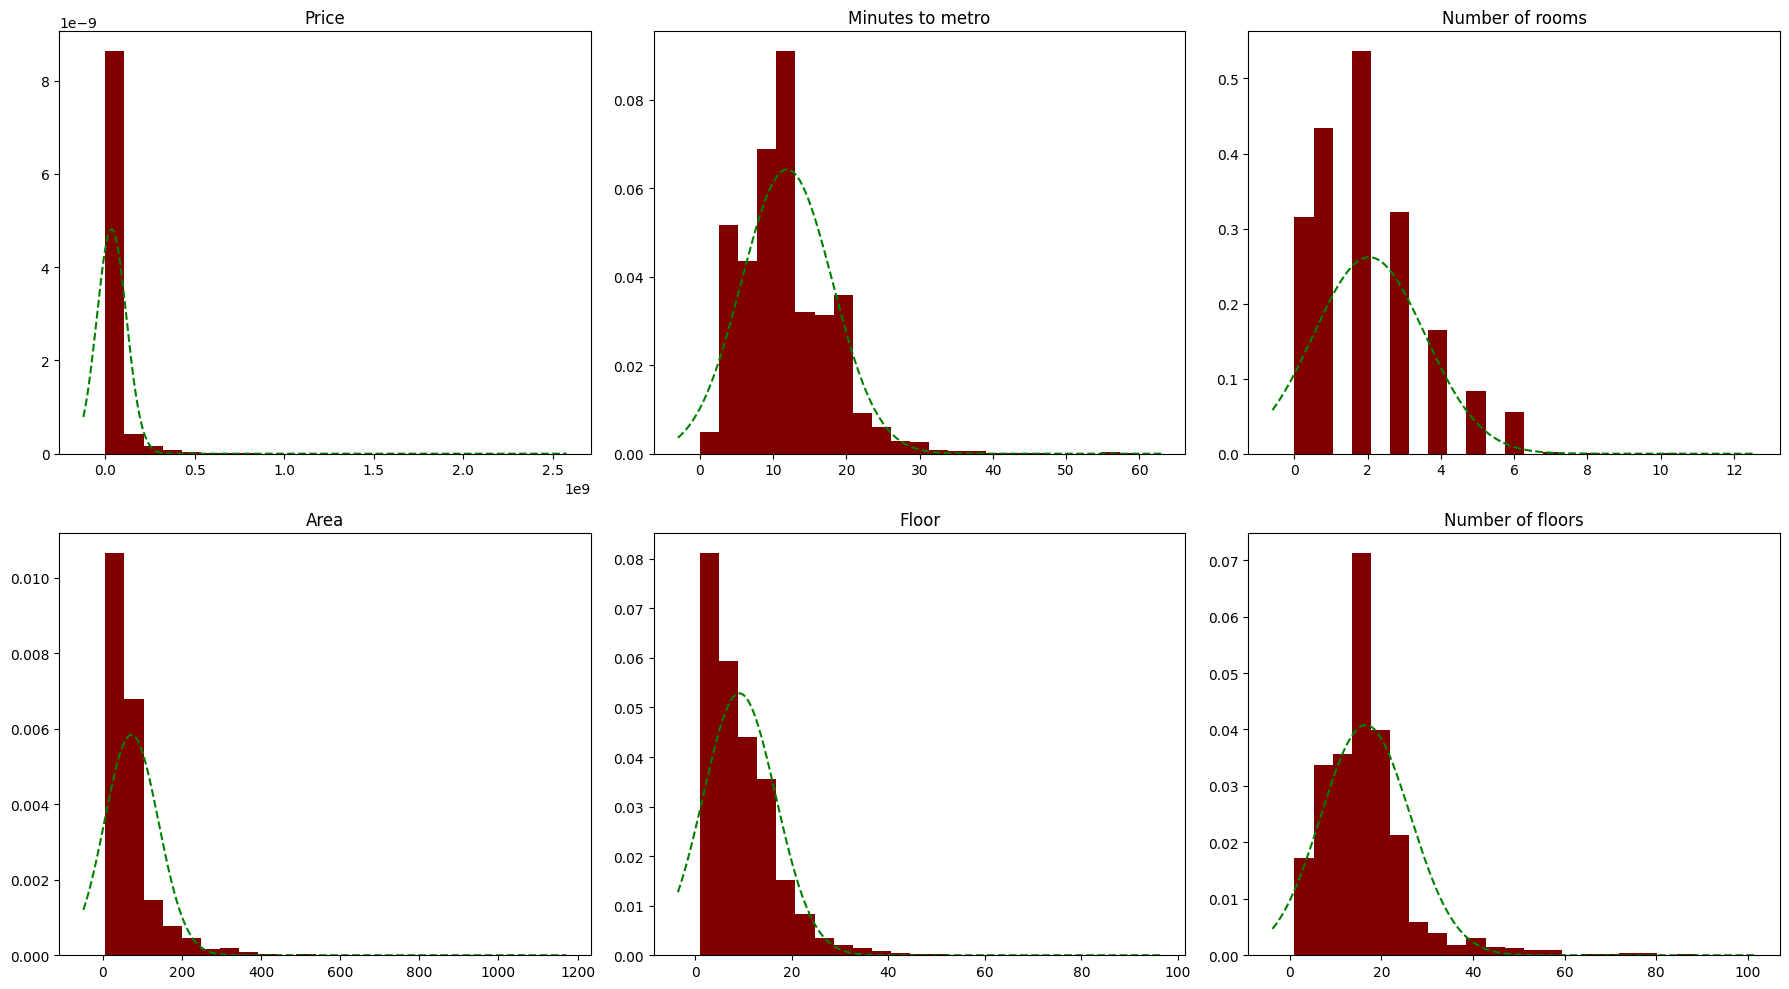

In [13]:
keys = ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Floor', 'Number of floors']
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18, 10)
axes = axes.flatten()
for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23, color='maroon')
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed', color='g')
    ax.set_title(key)

plt.tight_layout()

plt.show()


In [12]:
# # Вывод 30 самых больших значений в колонке 'Price'

# top_30_prices = df['Price'].nlargest(30)
# print(top_30_prices)


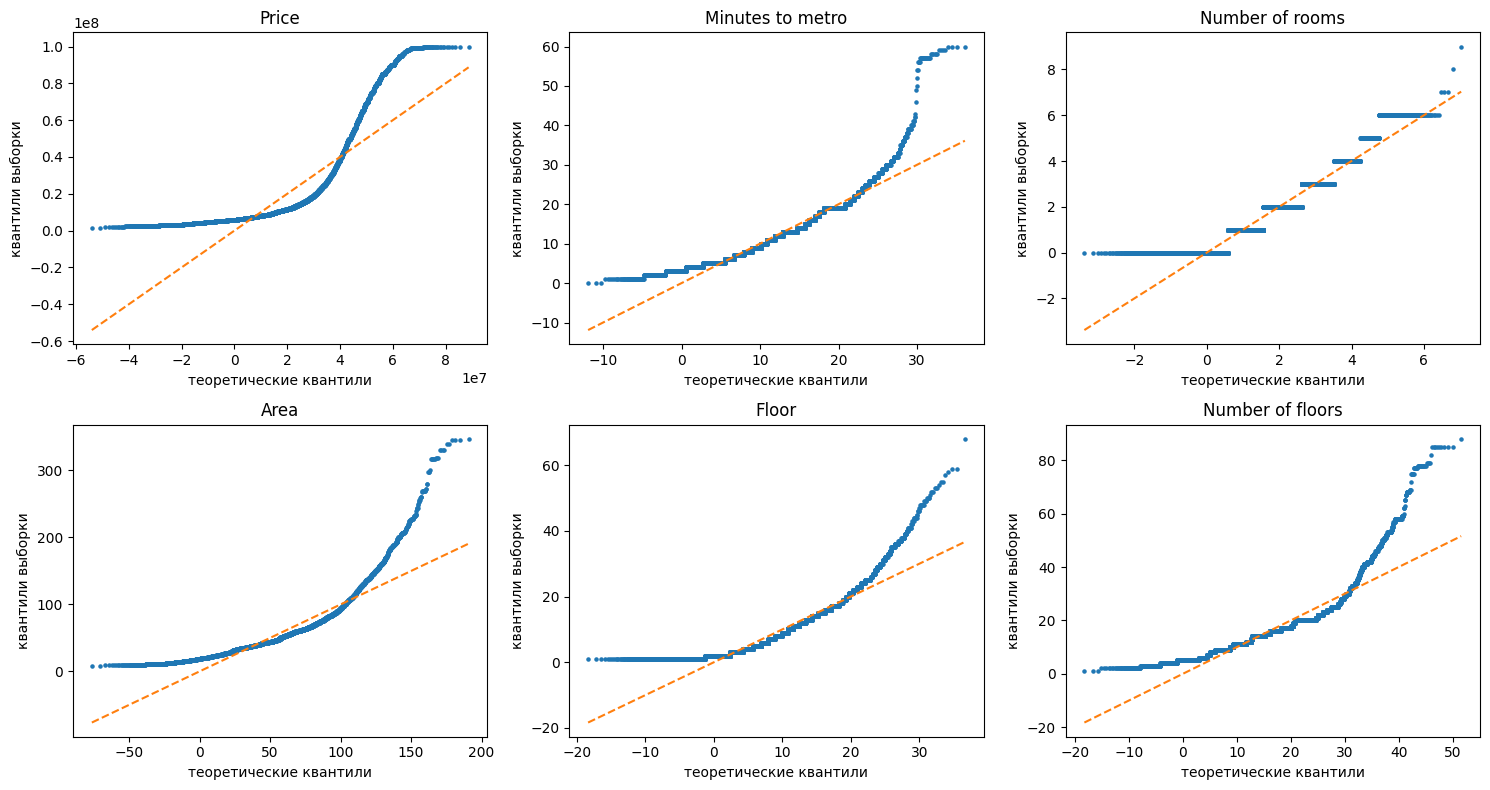

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15, 8)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df_filtered[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

plt.tight_layout()

Нормального распределения нет ни у одной величины

## Рассмотрим как зависят некоторые величины друг от друга. 
#### Зависимость цены на квартиру от удаленности от метро

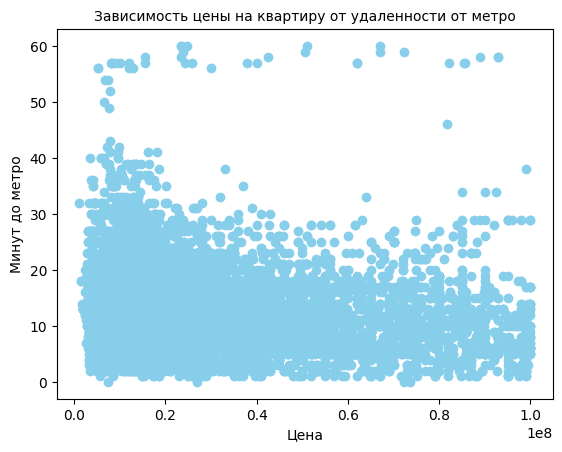

In [132]:
plt.scatter( df_filtered['Price'], df_filtered['Minutes to metro'],  color='skyblue')
plt.title("Зависимость цены на квартиру от удаленности от метро", fontsize=10)
plt.xlabel('Цена', fontsize=10)
plt.ylabel('Минут до метро', fontsize=10)

plt.show()

кажется, что зависимости между ценой и расположением относительно метро нет. проверим есть ли зависимость с помощью теста спирмена

In [187]:
# Статистический тест Спирмена
correlation, p_value = stats.spearmanr(df_filtered['Price'], df_filtered['Minutes to metro'])
print(f"Коэффициент корреляции Спирмена: {correlation}")
print(f"P-value: {p_value}")

# Проверка гипотезы на уровне значимости 0.05
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: существует статистически значимая зависимость между ценой и расстоянием до метро.")
else:
    print("Не можем отвергнуть нулевую гипотезу: статистически значимой зависимости между ценой и расстоянием до метро нет.")


Коэффициент корреляции Спирмена: -0.0559582027043748
P-value: 6.615422273638521e-16
Отвергаем нулевую гипотезу: существует статистически значимая зависимость между ценой и расстоянием до метро.


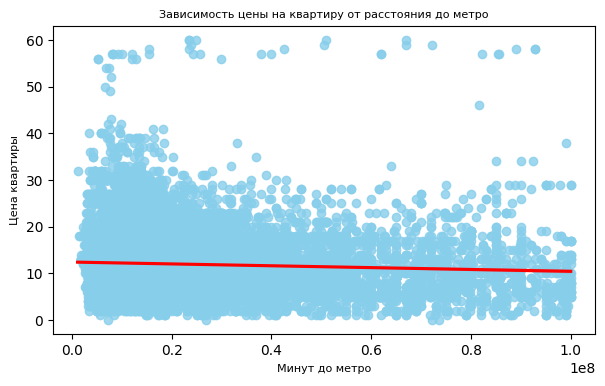

In [130]:
plt.figure(figsize=(7, 4))
# Построение scatter plot с линией регрессии
sns.regplot(x='Price', y='Minutes to metro', data=df_filtered, scatter_kws={'color':'skyblue'}, line_kws={'color':'red'})

plt.title('Зависимость цены на квартиру от расстояния до метро', fontsize=8)
plt.xlabel('Минут до метро', fontsize=8)
plt.ylabel('Цена квартиры', fontsize=8)
plt.show()

Все же можно проследить слабую зависимость между параметрами. Можно заметить, что чем выше цена на квартиру, тем больше выбросов в данных о расположении от метро. Это может быть связано с тем, что очень дорогие квартиры не ориентированы на людей, которые часто пользуются метро, скорее всего у них есть личныц траспорт и они не будут обращать внимания на параметр удаленности от ближайшего общественного транспорта. 

#### Так же рассмотрим наличие зависимости между еще двумя параметрами: ценой на квартиру и ее площадью

Видно, что между этими двумя параметрами прослеживается явная линейная звисимость -- чем больше  площадь квартиры, тем выше ее стоимость

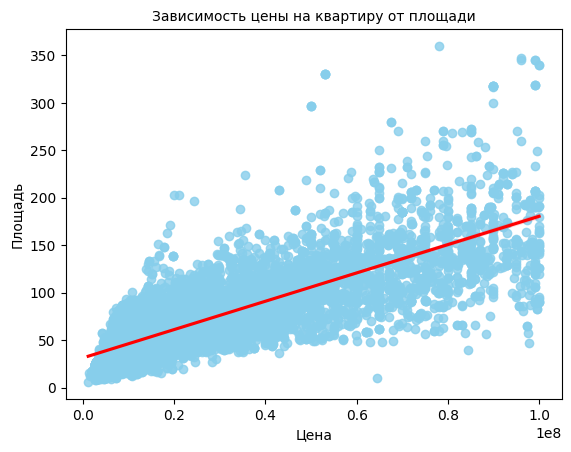

In [134]:
# Второй график - Зависимость цены на квартиру от площади

sns.regplot(x='Price', y='Area', data=df_filtered, scatter_kws={'color':'skyblue'}, line_kws={'color':'red'})

plt.title("Зависимость цены на квартиру от площади", fontsize=10)
plt.xlabel('Цена', fontsize=10)
plt.ylabel('Площадь', fontsize=10)
plt.show()

### Верно ли, что цены на квартиры зависят от того, рядом с какой станцией метро они располагаются?

In [154]:
df_filtered['Metro station'] = df_filtered['Metro station'].str.strip() #убираем пробелы в начале и конце слов
df_filtered['Metro station'].value_counts()

0              Опалиха
1              Павшино
2             Мякинино
3             Строгино
4              Опалиха
             ...      
22671       Котельники
22672    Домодедовская
22673       Котельники
22674         Жулебино
22675       Котельники
Name: Metro station, Length: 20806, dtype: object


Дополнительно загружаем таблицу в которой существуют координаты станций метро и удаляем из столбца с именами все пробелы

In [181]:
df_metro = pd.read_csv('metro_stations.csv')
df_metro['Russian_name'] = df_metro['Russian_name'].str.strip()
df_metro.head()

,Station_index,English_name,Line,Russian_name,Depth,Line_Neighbors,Transfers,Opened_Date,Lat,Lon,Station_Type
0,1,Bulvar Rokossovskogo,1,Бульвар Рокоссовского,-8.0,2,266,1990-08-01,55.8147,37.7342,column triple-span
1,2,Cherkizovskaya,1,Черкизовская,-9.0,1 3,267,1990-08-01,55.8039,37.7447,single-vault shallow
2,3,Preobrazhenskaya Ploshchad,1,Преображенская площадь,-8.0,2 4,NaN,1965-12-31,55.7964,37.7150,column triple-span
3,4,Sokolniki,1,Сокольники,-9.0,3 5,221,1935-05-15,55.7889,37.6803,single-vault shallow
4,5,Krasnoselskaya,1,Красносельская,-8.0,4 6,NaN,1935-05-15,55.7799,37.6673,column double-span


Соединяем наши таблицы по названиям станций и составляем новую таблицу 

In [182]:
merged_df = pd.merge(df_filtered, df_metro, left_on='Metro station', right_on='Russian_name')
df_koords = merged_df.groupby(['Metro station', 'Lat', 'Lon'])['Price'].median().reset_index()

df_koords.rename(columns={'Metro station': 'Station', 'Price': 'Median Price'}, inplace=True)

df_koords

,Station,Lat,Lon,Median Price
0,Авиамоторная,55.75240,37.719100,18400000.0
1,Авиамоторная,55.75367,37.719149,18400000.0
2,Автозаводская,55.70630,37.663100,22300000.0
3,Автозаводская,55.70740,37.657600,22300000.0
4,Академическая,55.68770,37.573300,16950000.0
...,...,...,...,...
271,Юго-Восточная,55.70497,37.819010,9500000.0
272,Юго-Западная,55.66360,37.483300,18900000.0
273,Южная,55.62240,37.609000,9600000.0
274,Ясенево,55.60630,37.533300,10850000.0


визуализация

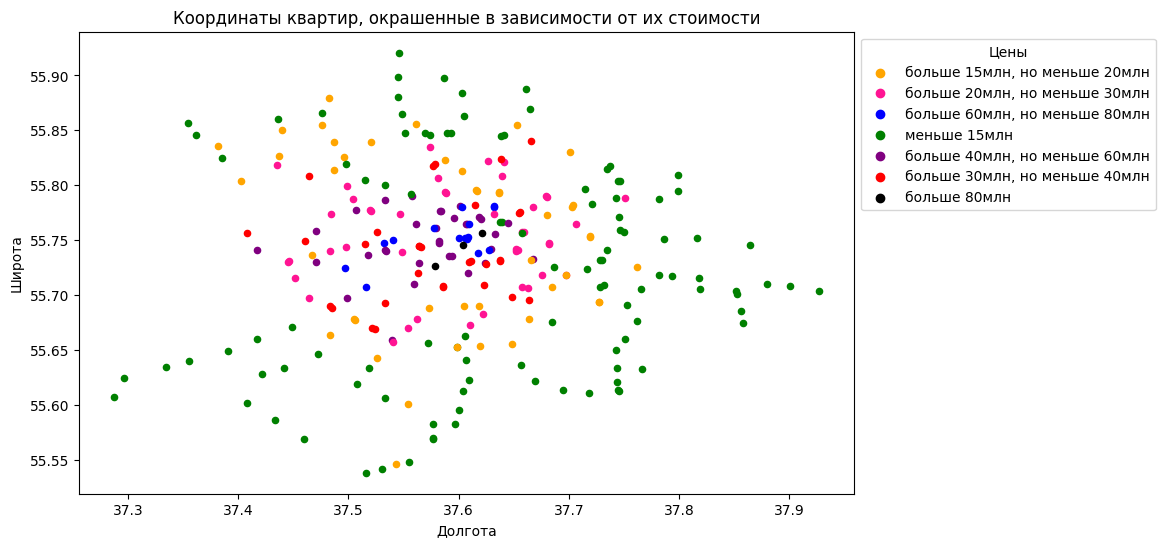

In [186]:
def get_color(price):
    if price <= 15000000:
        return 'green'
    #elif 12000000 <= price < 15000000:
    #    return 'yellow'
    elif 15000000 < price < 20000000:
        return 'orange'
    elif 20000000 <= price < 30000000:
        return 'deeppink'
    elif 30000000 <= price < 40000000:
        return 'red'
    elif 40000000 <= price < 60000000:
        return 'purple'
    elif 60000000 <= price < 80000000:
        return 'blue'
    else:
        return 'black'

def get_price(price):
    if price <= 15000000:
        return 'меньше 15млн'
    #elif 12000000 <= price < 15000000:
    #    return "больше 12млн, но меньше 15млн"
    elif 15000000 < price < 20000000:
        return "больше 15млн, но меньше 20млн"
    elif 20000000 <= price < 30000000:
        return "больше 20млн, но меньше 30млн"
    elif 30000000 <= price < 40000000:
        return "больше 30млн, но меньше 40млн"
    elif 40000000 <= price < 60000000:
        return "больше 40млн, но меньше 60млн"
    elif 60000000 <= price < 80000000:
        return "больше 60млн, но меньше 80млн"
    else:
        return "больше 80млн"

df_koords['Color'] = df_koords['Median Price'].apply(get_color)
df_koords['Value_price'] = df_koords['Median Price'].apply(get_price)

plt.figure(figsize=(10, 6))

unique_colors = df_koords['Color'].unique()
labels = {color: get_price(df_koords.loc[df_koords['Color'] == color, 'Median Price'].mean()) for color in unique_colors}

for i, row in df_koords.iterrows():
    plt.scatter(row['Lon'], row['Lat'], color=row['Color'], s=20) 

for color, label in labels.items():
    plt.scatter([], [], color=color, label=label)  

plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Координаты квартир, окрашенные в зависимости от их стоимости')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Цены')
plt.show()
#plt.savefig('plt.jpg')

Мы можем наблюдать, что в основном выполняется зависимость "чем ближе к центру, тем дороже" и есть лишь редкие выбросы - " исключения из правил", такие выбросы могут появляться из-за разных факторов, например, в центре москвы может быть однушка, а чуть подальше от центра - пятикомнатная квартира, в таком случае может возникать несоответствие с предполагаемой зависимостью.

#### Правильно ли предположение, что цены на квартиры в области ниже, чем в Москве?

<BarContainer object of 2 artists>

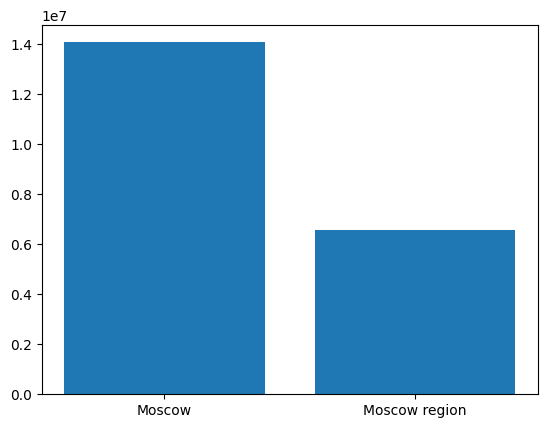

In [202]:
df_oblmsk = df_filtered.groupby(['Region'])['Price'].median().reset_index()
#df_oblmsk
fig, ax = plt.subplots()
plt.bar( df_oblmsk['Region'], df_oblmsk['Price'])


In [ ]:
проверить на равенство мат ожиданий .

Можно увидеть, что действительно, медианная стоимость квартир в Москве гораздо выше, чем в регионах

## Посмотрим, зависит ли цена от расположения метро у квартир которые стоях дороже 100млн

In [207]:
df_filtered_exp = df.nlargest(1870, 'Price')
df_filtered_exp.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,1.870000e+03,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000
mean,2.449945e+08,9.597861,4.477540,236.046048,119.915455,26.015348,9.545989,15.488770
std,1.786805e+08,6.291713,1.369733,119.569344,73.281363,13.174684,11.726907,16.289471
min,1.000000e+08,0.000000,0.000000,55.000000,5.300000,6.000000,1.000000,1.000000
25%,1.390000e+08,6.000000,4.000000,161.725000,75.225000,18.025000,3.000000,6.000000
50%,1.860000e+08,8.000000,5.000000,201.950000,107.800000,22.400000,5.000000,9.000000
75%,2.890000e+08,12.000000,5.000000,283.100000,153.250000,30.000000,11.000000,17.000000
max,2.455020e+09,48.000000,10.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


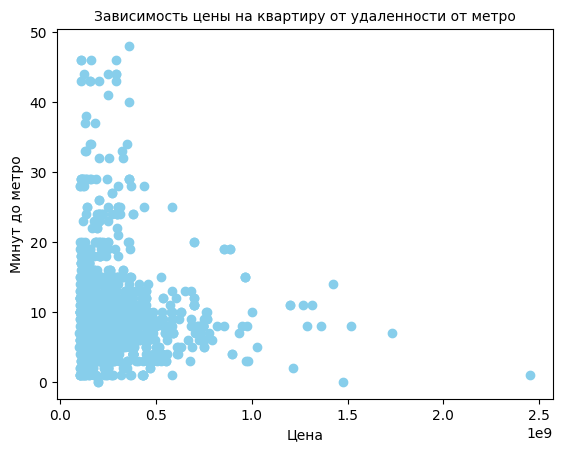

In [208]:
plt.scatter( df_filtered_exp['Price'], df_filtered_exp['Minutes to metro'],  color='skyblue')
plt.title("Зависимость цены на квартиру от удаленности от метро", fontsize=10)
plt.xlabel('Цена', fontsize=10)
plt.ylabel('Минут до метро', fontsize=10)

plt.show()

Из графика можно увидеть, что зависимости от расположения метро нет.

#### Рассмотрим так же зависимость от расположения рядом с определенными станциями 

In [210]:
merged_df_exp = pd.merge(df_filtered_exp, df_metro, left_on='Metro station', right_on='Russian_name')
df_koords_exp = merged_df_exp.groupby(['Metro station', 'Lat', 'Lon'])['Price'].median().reset_index()

df_koords_exp.rename(columns={'Metro station': 'Station', 'Price': 'Median Price'}, inplace=True)

df_koords_exp

,Station,Lat,Lon,Median Price
0,Академическая,55.6877,37.5733,110000000.0
1,Алексеевская,55.8088,37.6390,165000000.0
2,Арбатская,55.7518,37.6007,205072300.0
3,Арбатская,55.7522,37.6061,205072300.0
4,Аэропорт,55.8003,37.5329,145000000.0
...,...,...,...,...
94,Чеховская,55.7644,37.6097,170000000.0
95,Чистые пруды,55.7658,37.6444,151995000.0
96,Чкаловская,55.7565,37.6573,106999999.0
97,Шаболовская,55.7198,37.6083,170000000.0


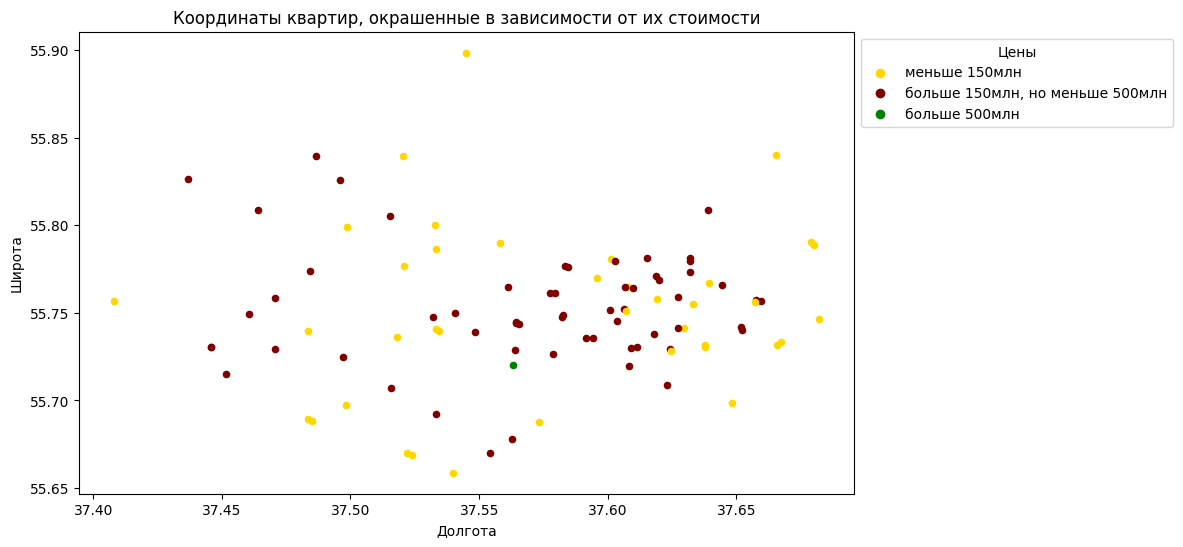

In [215]:
#2455020000
def get_color(price):
    if price <= 150000000:
        return 'gold'
    #elif 12000000 <= price < 15000000:
    #    return 'yellow'
    elif 150000000 < price < 500000000:
        return 'maroon'
    #elif 800000000 <= price < 1000000000:
        #return 'red'
    #elif 1000000000 <= price < 2000000000:
        #return 'blue'
    else:
        return 'green'

def get_price(price):
    if price <= 150000000:
        return 'меньше 150млн'
    #elif 12000000 <= price < 15000000:
    #    return 'yellow'
    elif 150000000 < price < 500000000:
        return 'больше 150млн, но меньше 500млн'
    #elif 500000000 <= price < 2000000000:
    #    return 'больше 500млн, но меньше 2млрд'
    #elif 800000000 <= price < 1000000000:
    #    return 'больше 800млн, но меньше 1млрд'
    #elif 1000000000 <= price < 2000000000:
    #    return 'больше 1млрд, но меньше 2млрд'
    else:
        return 'больше 500млн'

df_koords_exp['Color'] = df_koords_exp['Median Price'].apply(get_color)
df_koords_exp['Value_price'] = df_koords_exp['Median Price'].apply(get_price)

plt.figure(figsize=(10, 6))

unique_colors = df_koords_exp['Color'].unique()
labels = {color: get_price(df_koords_exp.loc[df_koords_exp['Color'] == color, 'Median Price'].mean()) for color in unique_colors}

for i, row in df_koords_exp.iterrows():
    plt.scatter(row['Lon'], row['Lat'], color=row['Color'], s=20) 

for color, label in labels.items():
    plt.scatter([], [], color=color, label=label)  

plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Координаты квартир, окрашенные в зависимости от их стоимости')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Цены')
plt.show()
#plt.savefig('plt.jpg')

Также можем заметить, что цена квартир не зависит от расположения рядом с опредеденной станцией метро, однако заметим, что границы координат сузились, значит в целом квартиры, которые стоят выше 100млн располагаются ближе к центру, но само расположение с конкретными станциями уже не важно 